# Wave Propagation Method and BPM in 3D

WPM method is very fast. It is based on S. Schmidt et al., “Wave-optical modeling beyond the thin-element-approximation,” Opt. Express, vol. 24, no. 26, p. 30188, 2016.


In [1]:
from diffractio import np, plt, sp, um, mm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

In [2]:
from matplotlib import rcParams
rcParams['figure.dpi']=150

## Propagation at vacuum

In [3]:
x=np.linspace(-50*um,50*um, 256)
y=np.linspace(-50*um,50*um, 256)
z=np.linspace(0,500*um,256)
wavelength=.6*um

In [4]:
t0=Scalar_mask_XY(x,y,wavelength)
t0.circle(r0=(0,0), radius=45*um, angle=0)

In [5]:
u=Scalar_mask_XYZ(x,y, z, wavelength)
u.incident_field(u0=t0)

## WPM

Time = 6.39 s, time/loop = 24.94 ms
CPU times: user 6.02 s, sys: 665 ms, total: 6.69 s
Wall time: 6.65 s


<Figure size 432x288 with 0 Axes>

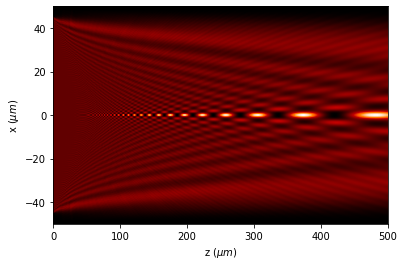

In [6]:
%%time
u.clear_field()
u.WPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=False)

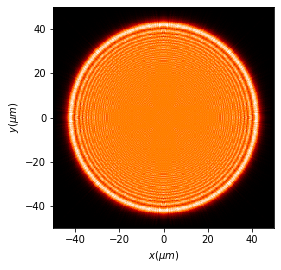

In [7]:
u.draw_XY(z0=20, logarithm=True)

In [9]:
# u.draw_XYZ()

## BPM

CPU times: user 2.81 s, sys: 128 ms, total: 2.94 s
Wall time: 2.96 s


<Figure size 432x288 with 0 Axes>

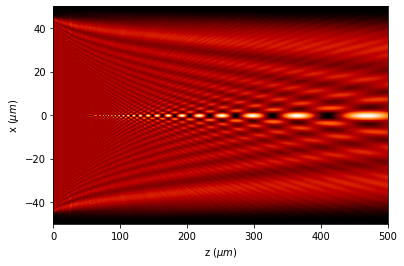

In [10]:
%%time
u.clear_field()
u.BPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=True);

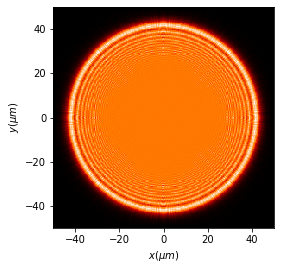

In [11]:
u.draw_XY(z0=20, logarithm=True)

At vacuum both techniques work fine.

## Diffraction by an sphere

WPM and BPM also allow propagation through a XYZ refraction index structure.


In [12]:
x=np.linspace(-15*um,15*um,256 )
y=np.linspace(-15*um,15*um, 256)
z=np.linspace(0,30*um,256)
wavelength=0.6328*um

In [13]:
t0=Scalar_mask_XY(x,y,wavelength)
t0.circle(r0=(0,0), radius=12.5*um, angle=0)

u0=Scalar_source_XY(x,y,wavelength)
u0.plane_wave(A=1)

In [14]:
u=Scalar_mask_XYZ(x,y, z, wavelength)
u.sphere(r0=(0,0,12.5), radius=10*um, refraction_index=2, angles=(0,0,0));

In [15]:
u.incident_field(u0=u0*t0)

In [16]:
# u.draw_refraction_index()

### WPM

In [17]:
%%time
u.clear_field()
u.WPM(verbose=True,has_edges=True)

Time = 7.79 s, time/loop = 30.44 ms
CPU times: user 7.84 s, sys: 123 ms, total: 7.96 s
Wall time: 7.95 s


<Figure size 432x288 with 0 Axes>

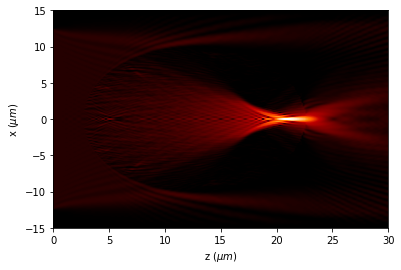

In [23]:
u.draw_XZ(y0=0, logarithm=True);

In [19]:
u2=u.cut_resample([-10,10],[-10,10], num_points=(128,128,128),new_field=True)

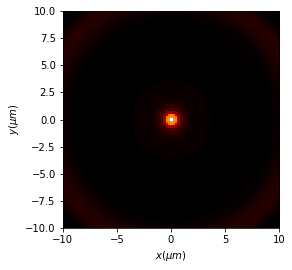

In [20]:
u2.draw_XY(z0=20.5, logarithm=True)

In [21]:
# u.draw_XYZ(logarithm=True)

### BPM

In [24]:
%%time
u.clear_field()
u.BPM(verbose=True,has_edges=True)

CPU times: user 2.75 s, sys: 110 ms, total: 2.86 s
Wall time: 2.84 s


<Figure size 432x288 with 0 Axes>

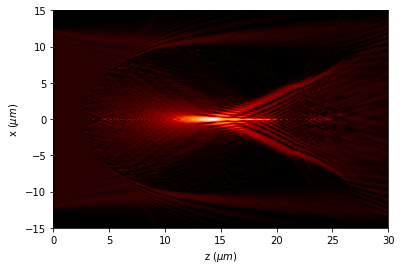

In [25]:
u.draw_XZ(y0=0, logarithm=True);

In this case, the results are quite different. As the difference of refraction indexes is high, WPM produces better results.